In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import src.starter.utils as starter
import src.starter.visualize as vis
import src.starter.visualize2 as vis2
from src.vis_utils import multi_slice_viewer, find_first_kidney_slice
    
data = pd.read_csv("data_interpolated_stats.csv")

In [2]:
im, mask = starter.load_case("00192")

In [70]:
overlayed = vis.overlayed_images(im, mask)

In [71]:
def show_slices(overlayed_volume, columns=3, figsize=(50, 50)):
    """ Function to display row of image slices """
    rows = (overlayed_volume.shape[0] // columns) + 1
    fig, axes = plt.subplots(rows, columns, figsize=figsize)
    for i in range(overlayed_volume.shape[0]):
        row = i // columns
        column = i - row * columns 
        slice = overlayed_volume[i, :, :, :]
        axes[row][column].imshow(slice)

In [47]:
# show_slices(overlayed[60:80, :, :, :])

In [3]:
%matplotlib notebook
mpl.rcParams['figure.figsize'] = (10,10)

i = 0
row = data.iloc[i]
case_nid = row['case_nid']
tumor_volume = row['tumor_volume']
kidney_volume = row['kidney_volume']
im, mask = starter.load_case(case_nid)

Case 0 kidney size: 209748.0 tumor size: 4160.0 slices: 42


<IPython.core.display.Javascript object>


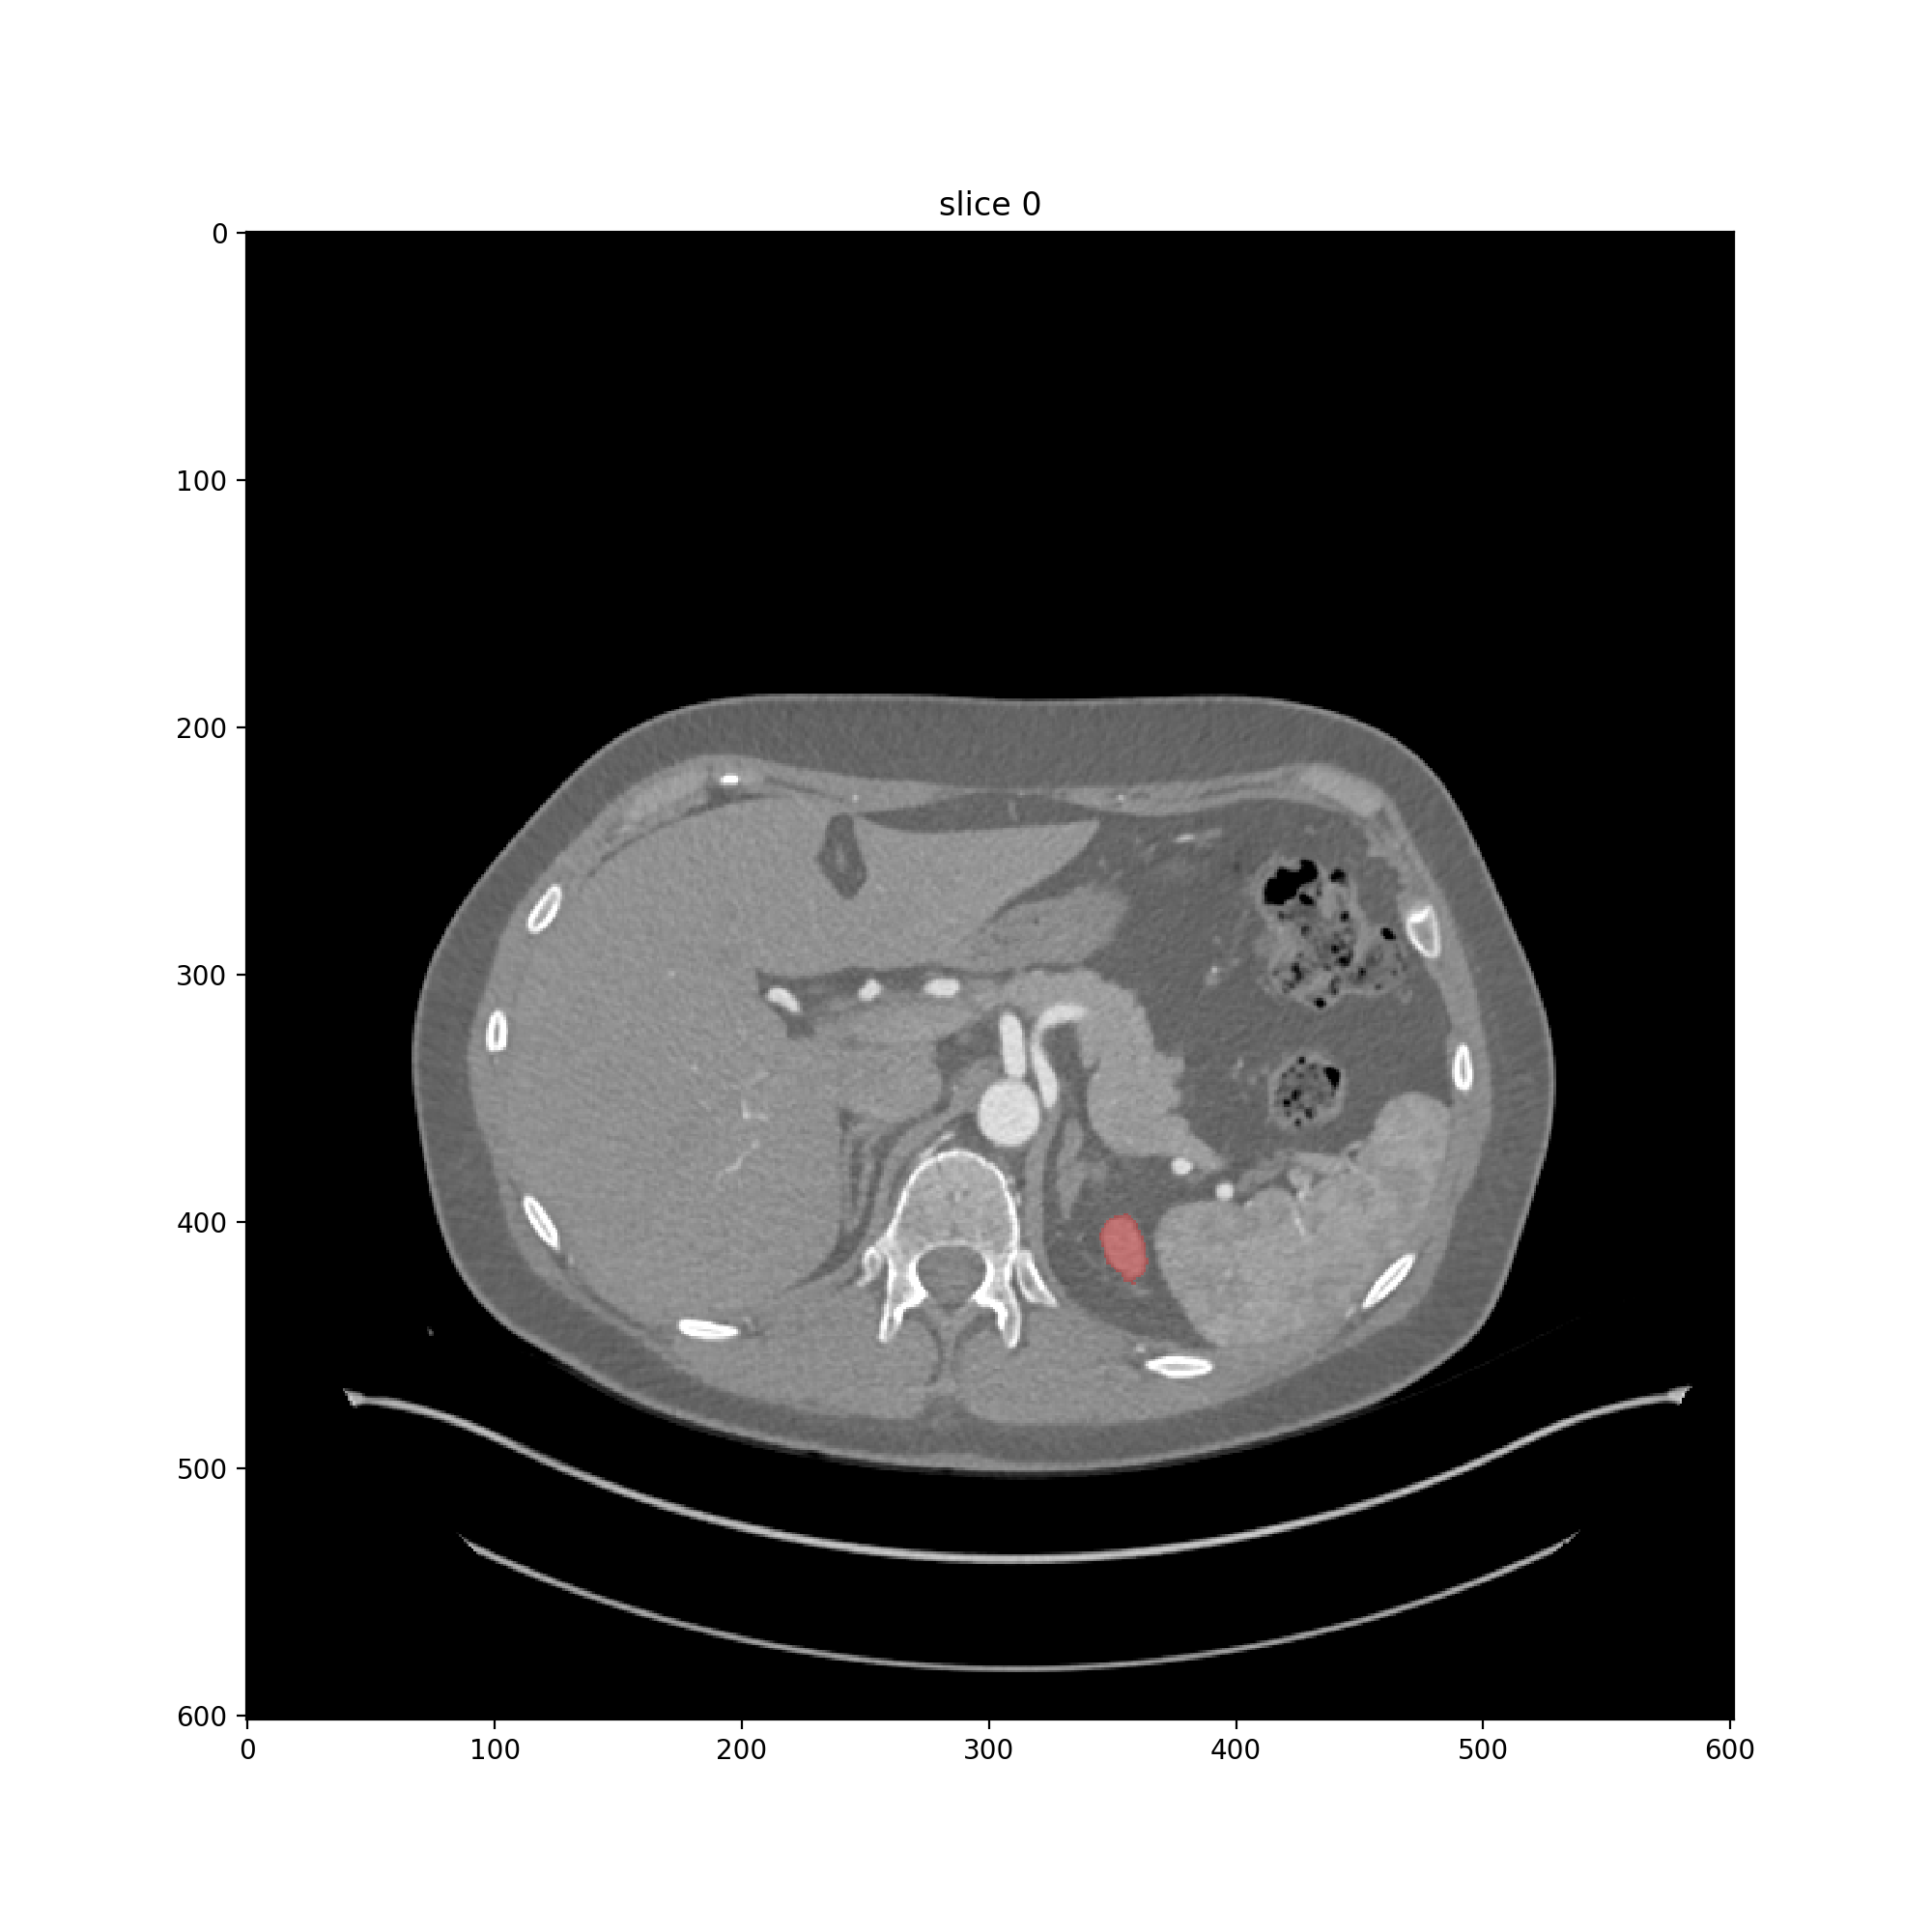

In [7]:
overlayed = vis2.overlayed_images(im, mask, plane='axial')
first_index, last_index = find_first_kidney_slice(mask, with_last=True)
print('Case', case_nid, 'kidney size:', kidney_volume, 'tumor size:', tumor_volume, 'slices:', last_index - first_index)
multi_slice_viewer(overlayed[first_index:last_index])

Case 0 kidney size: 209748.0 tumor size: 4160.0 slices: 269


<IPython.core.display.Javascript object>


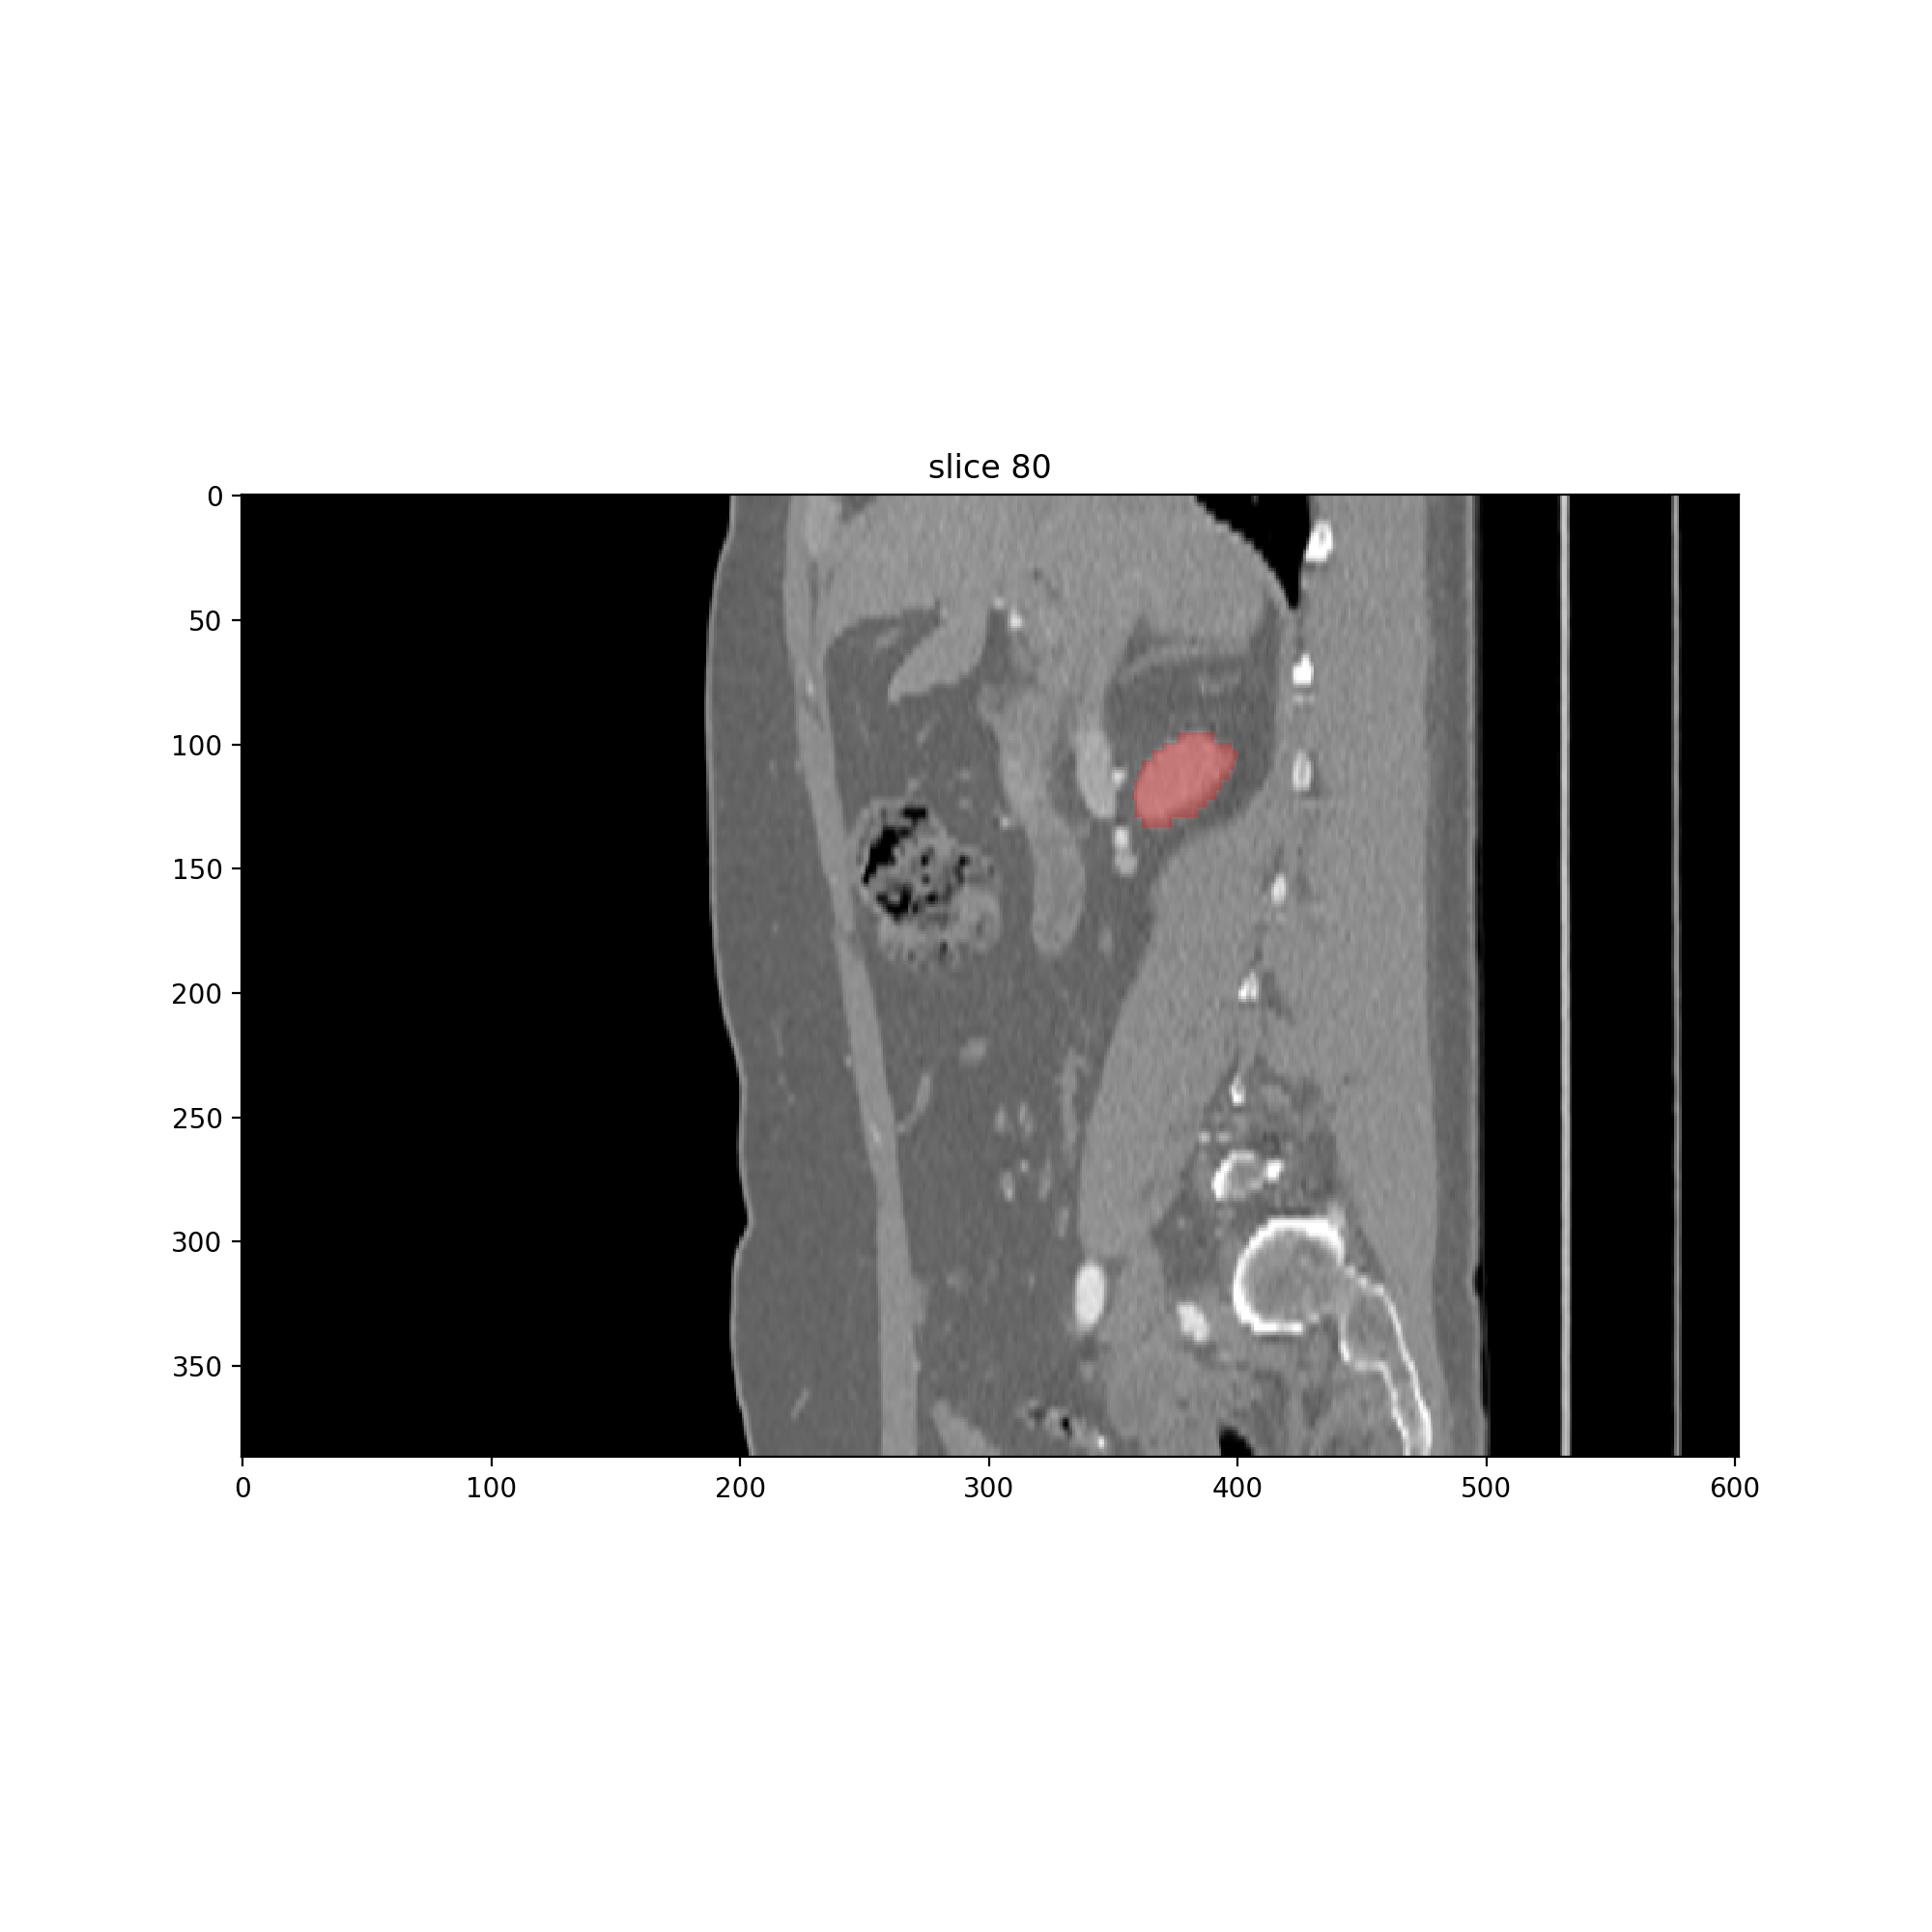

In [8]:
overlayed = vis2.overlayed_images(im, mask, plane='sagittal')
first_index, last_index = find_first_kidney_slice(mask, plane='sagittal', with_last=True)
print('Case', case_nid, 'kidney size:', kidney_volume, 'tumor size:', tumor_volume, 'slices:', last_index - first_index)
multi_slice_viewer(overlayed[first_index:last_index])

Case 0 kidney size: 209748.0 tumor size: 4160.0 slices: 269


<IPython.core.display.Javascript object>


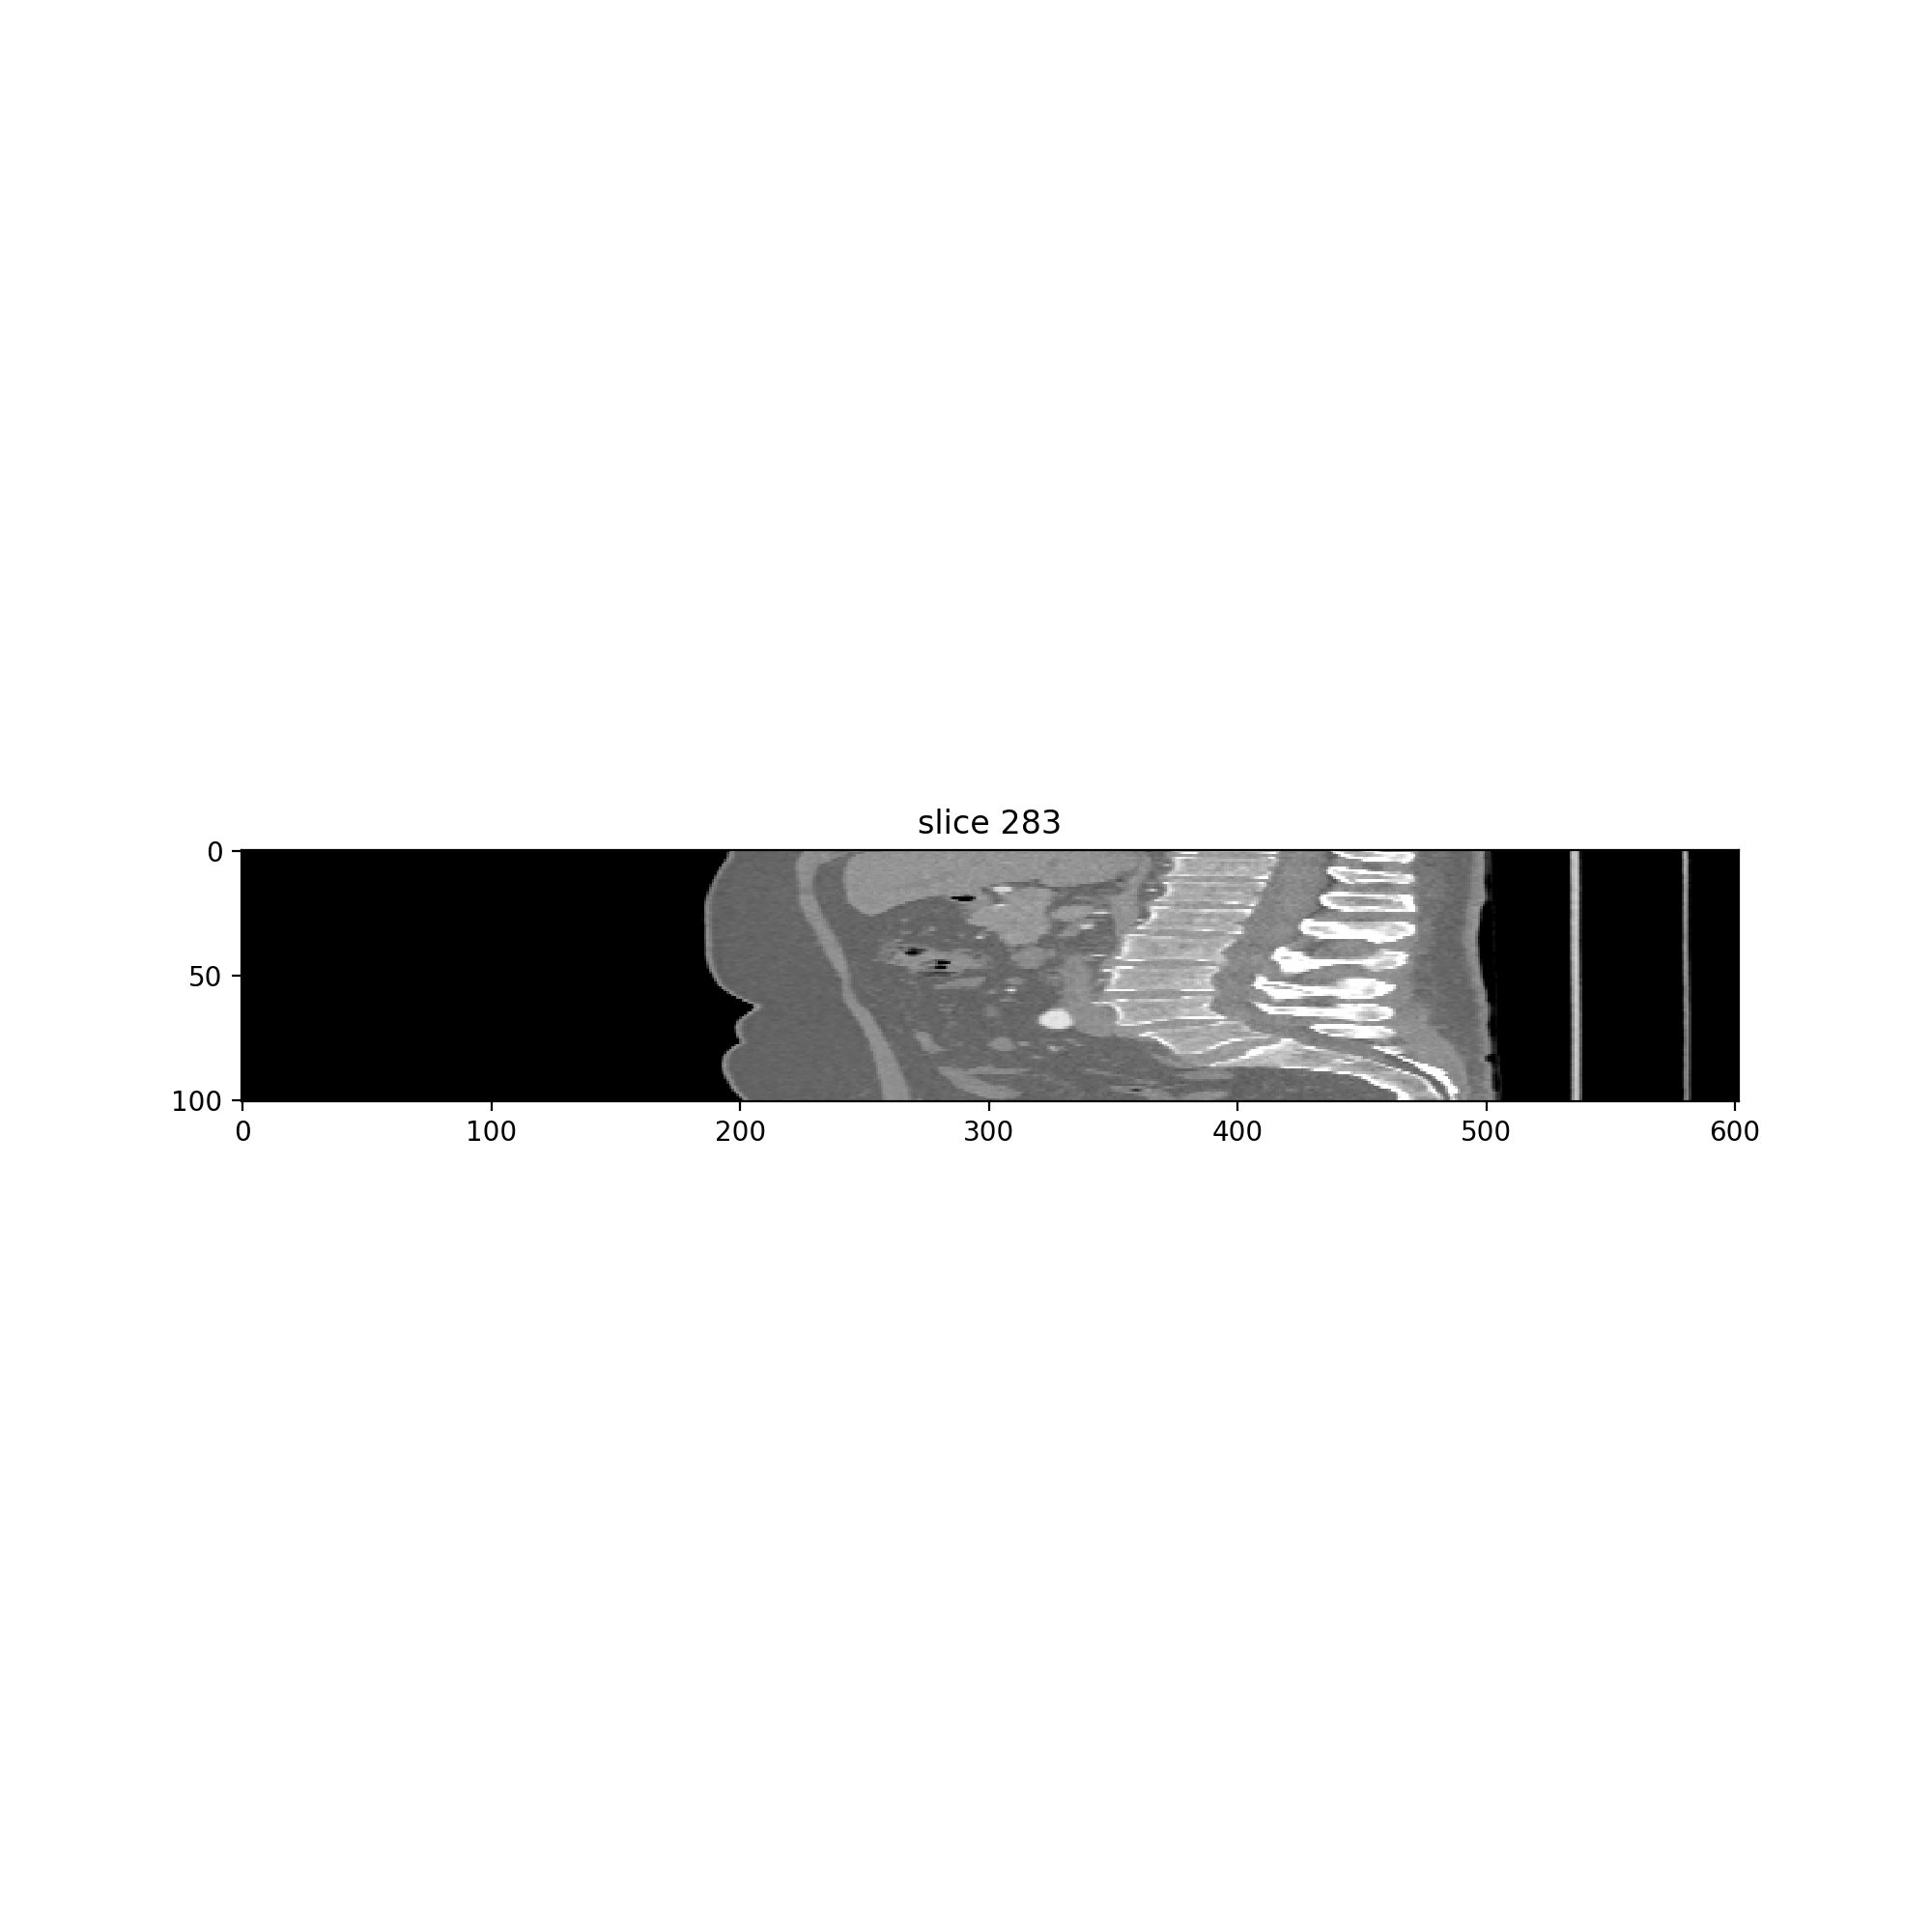

In [19]:
overlayed = vis2.overlayed_images(im, mask)
print('Case', case_nid, 'kidney size:', kidney_volume, 'tumor size:', tumor_volume, 'slices:', last_index - first_index)
multi_slice_viewer(overlayed.transpose(2,0,1,3))

Case 0 kidney size: 209748.0 tumor size: 4160.0 slices: 269


<IPython.core.display.Javascript object>


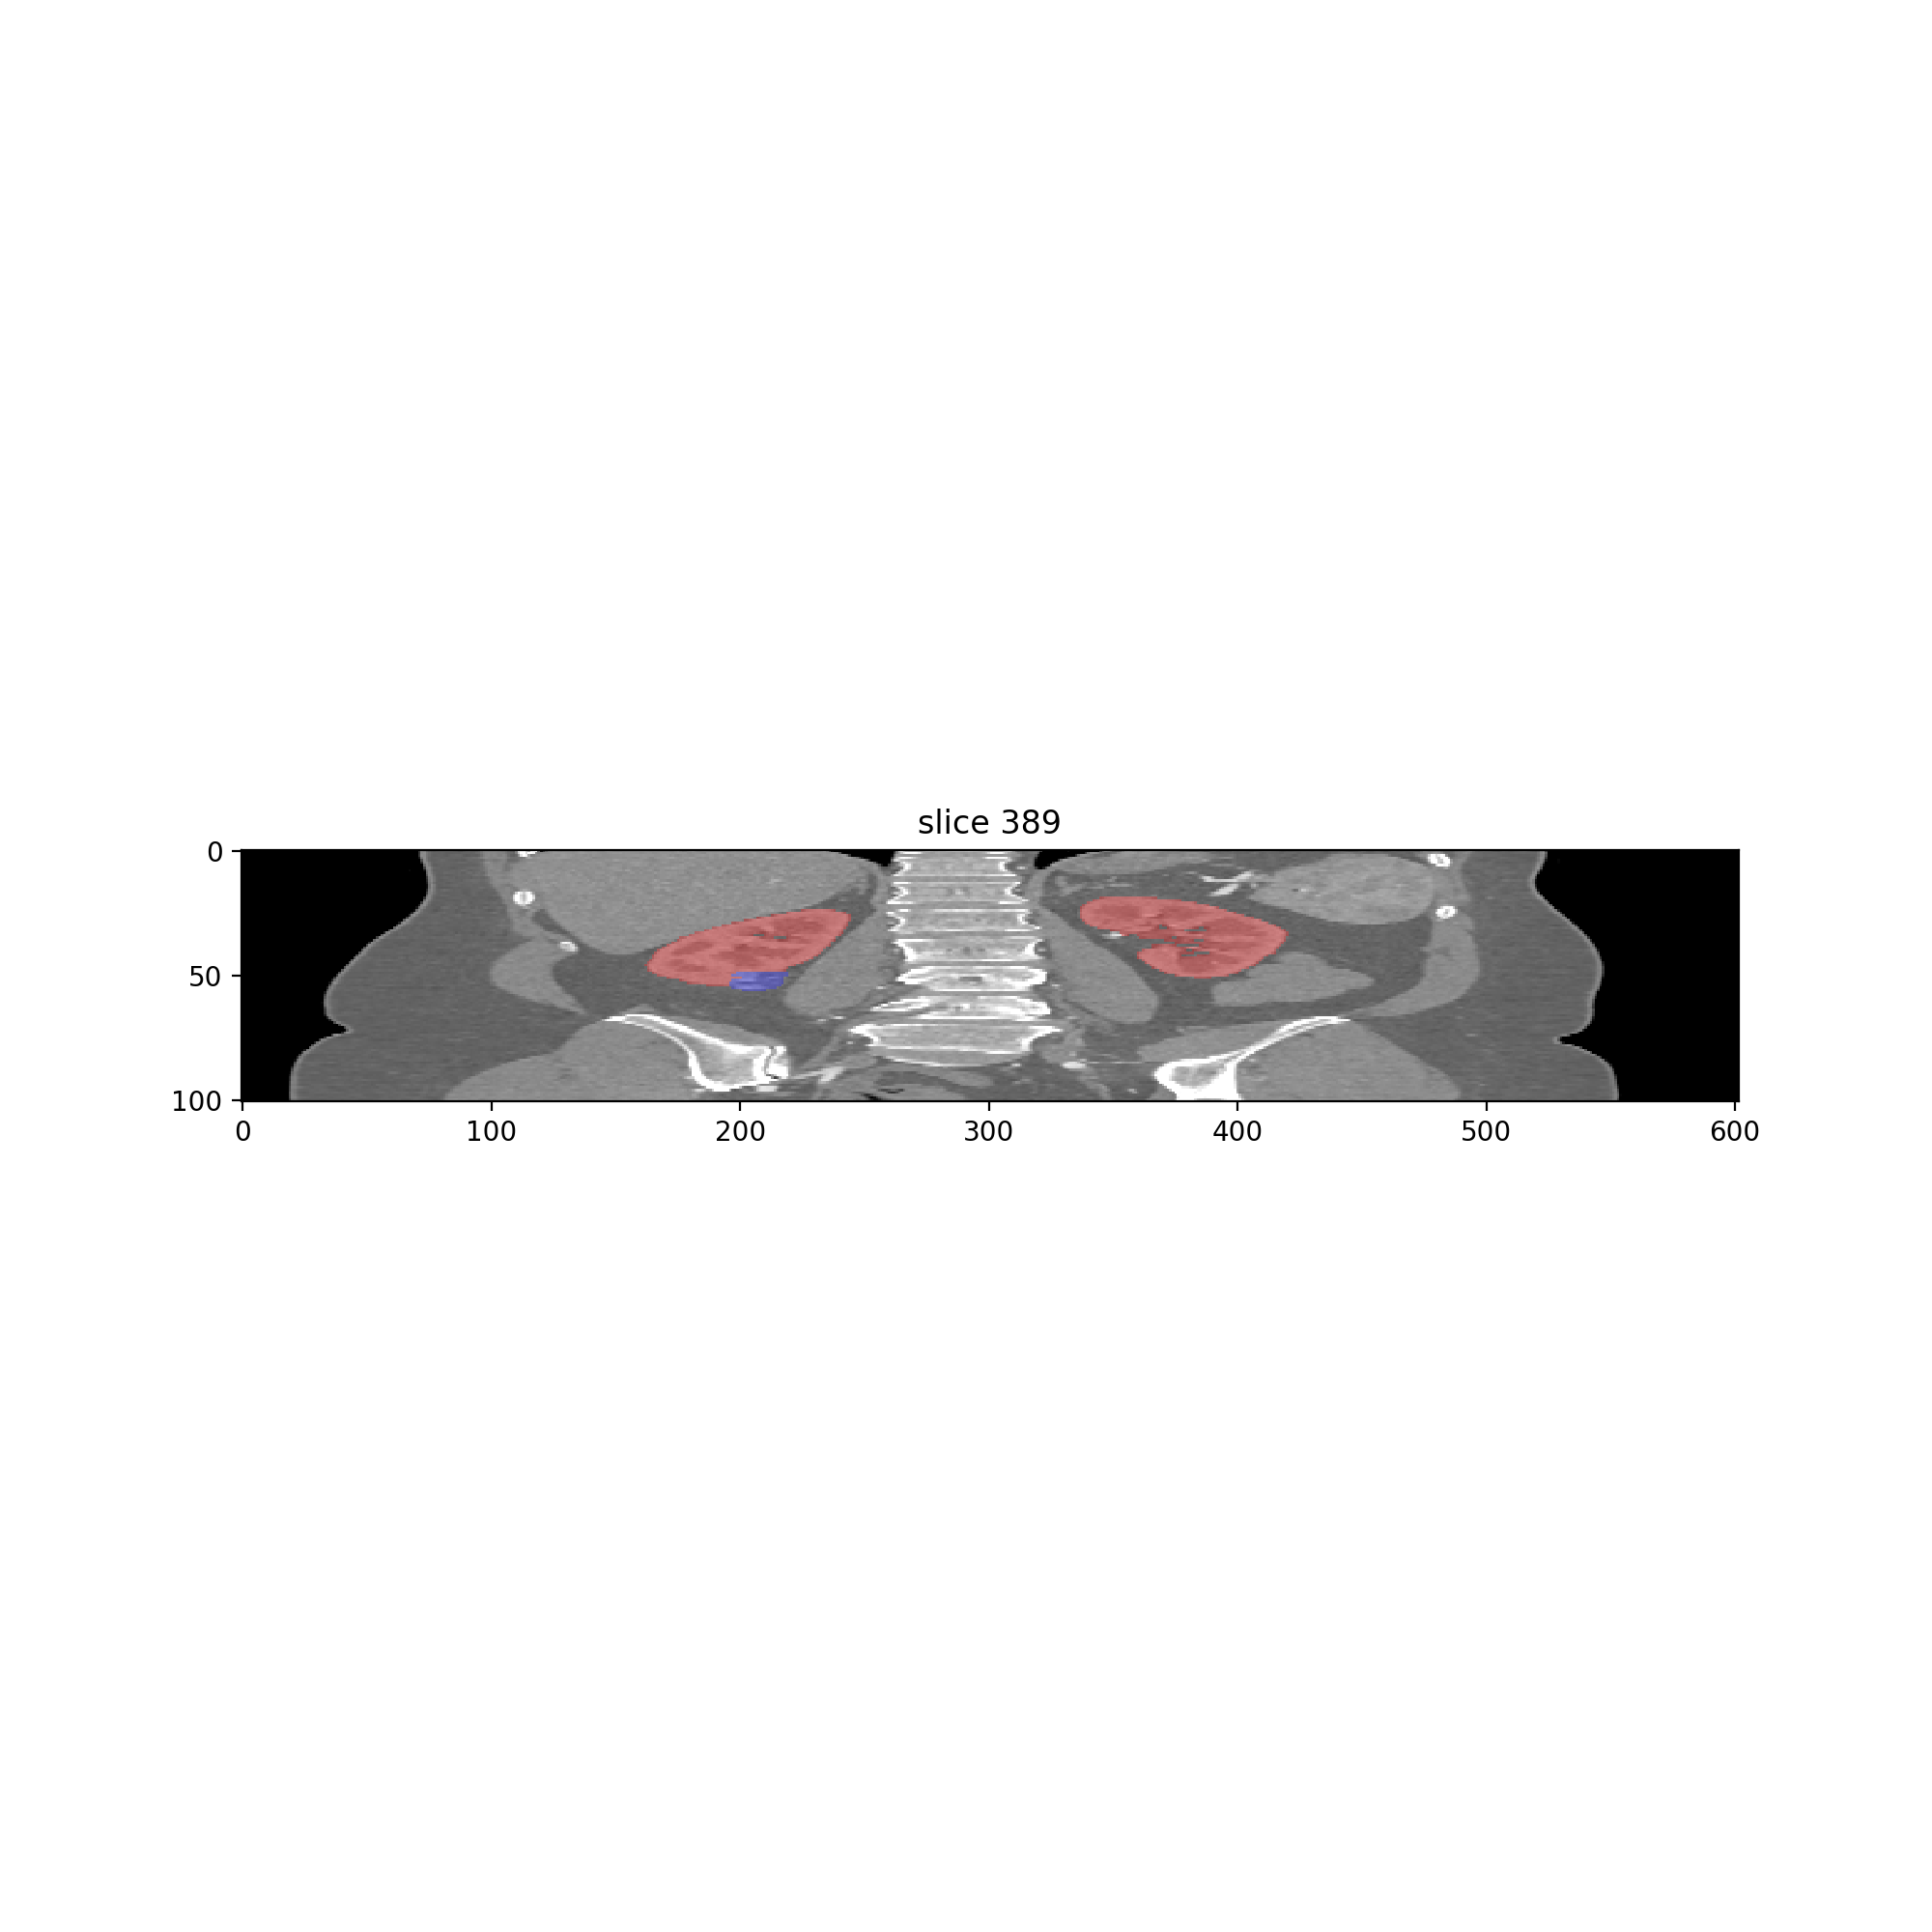

In [12]:
overlayed = vis2.overlayed_images(im, mask)
print('Case', case_nid, 'kidney size:', kidney_volume, 'tumor size:', tumor_volume, 'slices:', last_index - first_index)
multi_slice_viewer(overlayed.transpose(1,0,2,3))